In [1]:
np.random.seed(0)
x = np.random.normal(size=21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

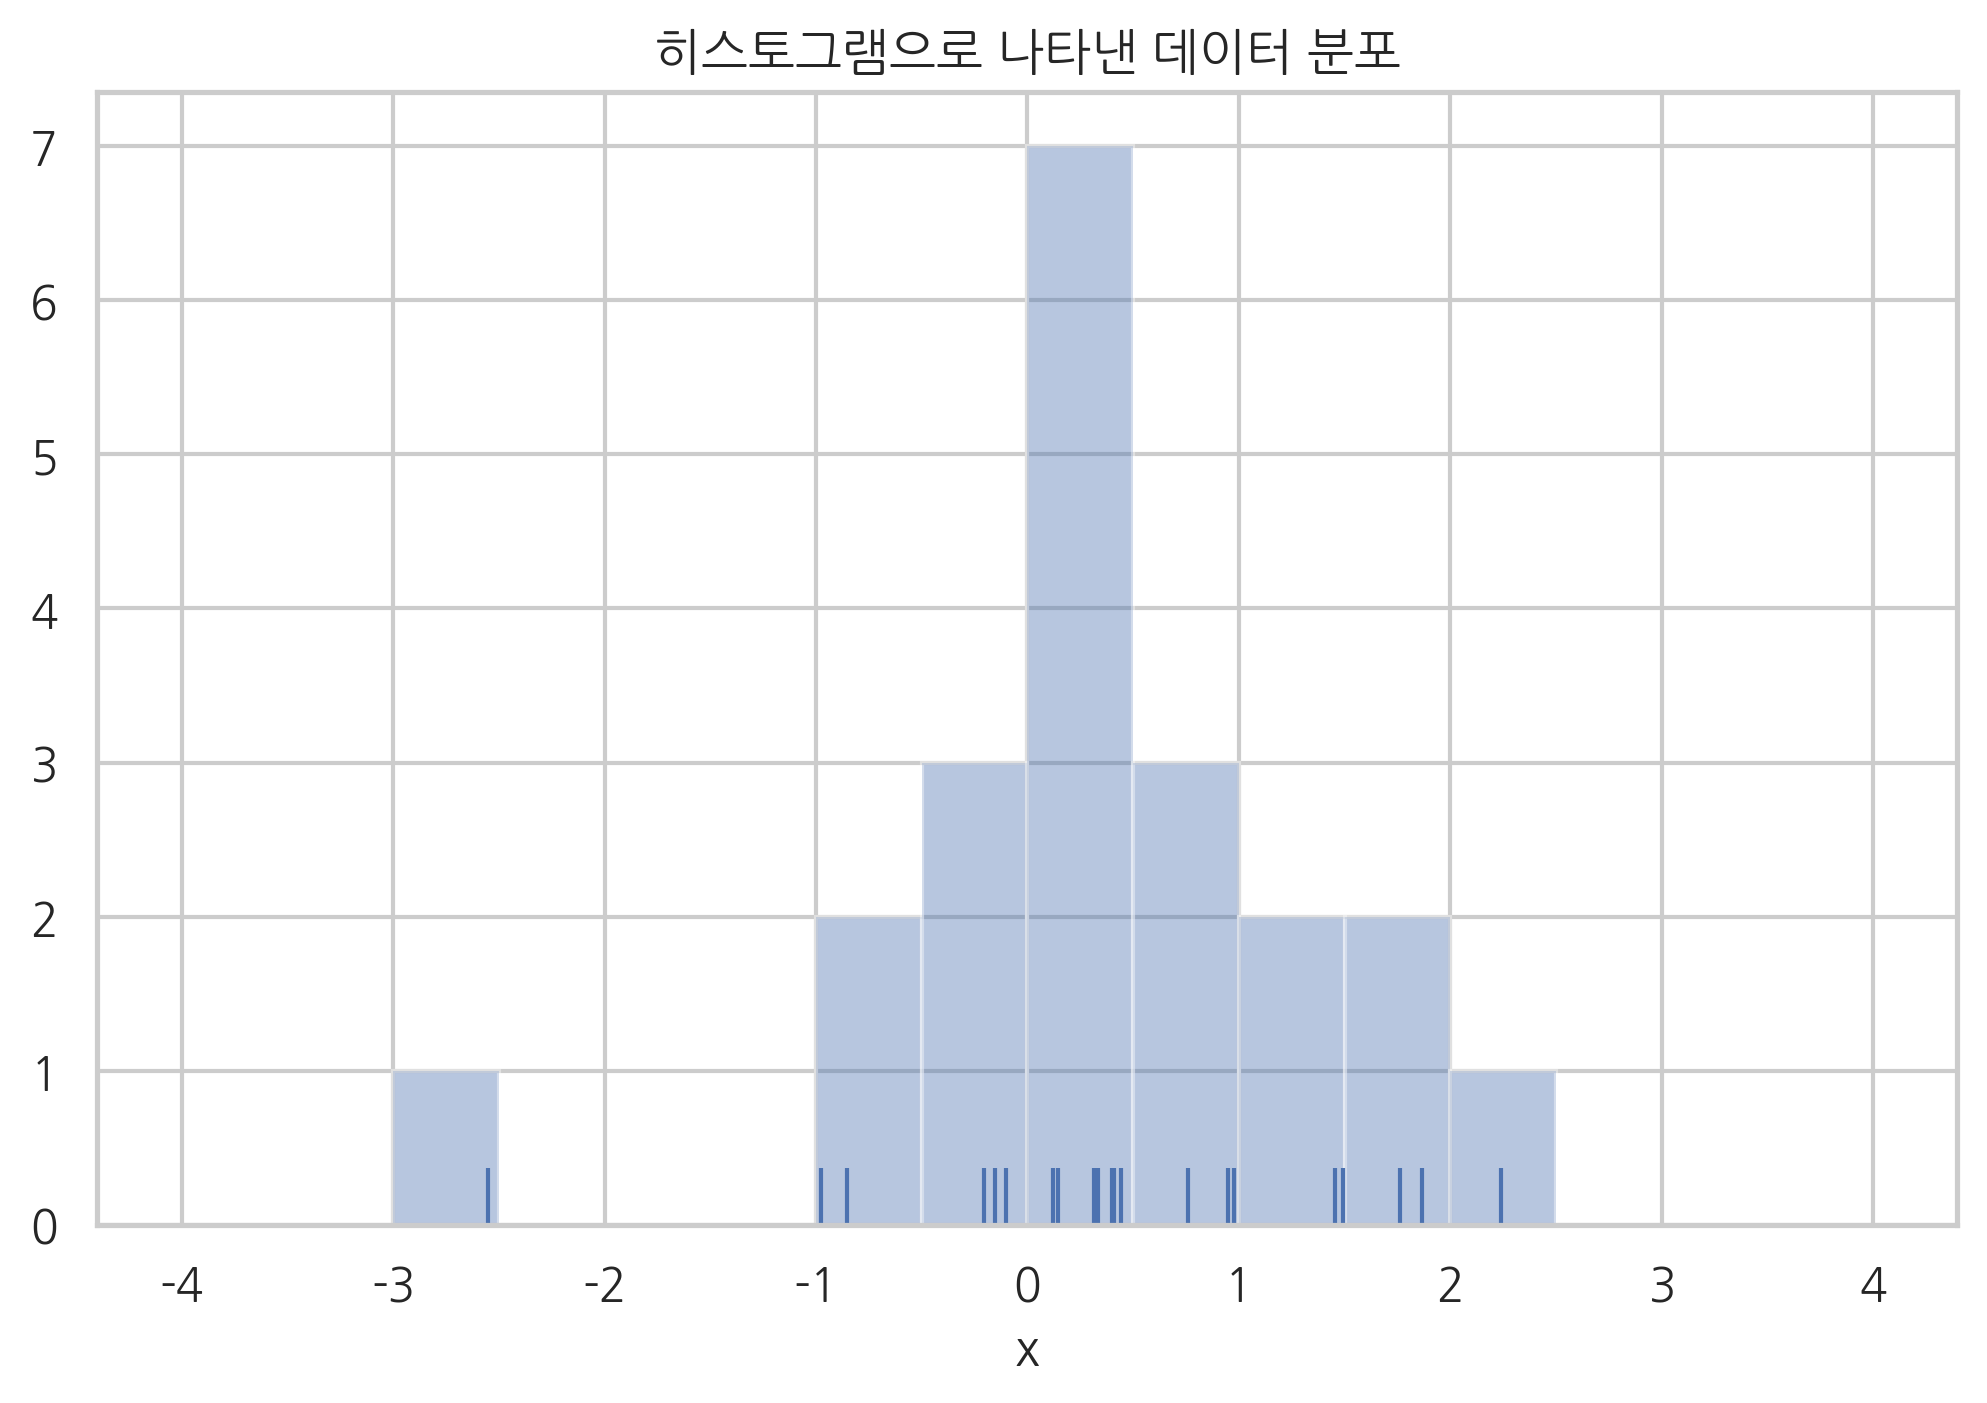

In [2]:
bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.show()

In [3]:
print("표본평균 = {}, 표본중앙값 = {}".format(np.mean(x), np.median(x)))

표본평균 = 0.4206524782418389, 표본중앙값 = 0.4001572083672233


In [4]:
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print("최빈구간 = {}~{}".format(bins[m_bin], bins[m_bin + 1]))

최빈구간 = 0.0~0.5


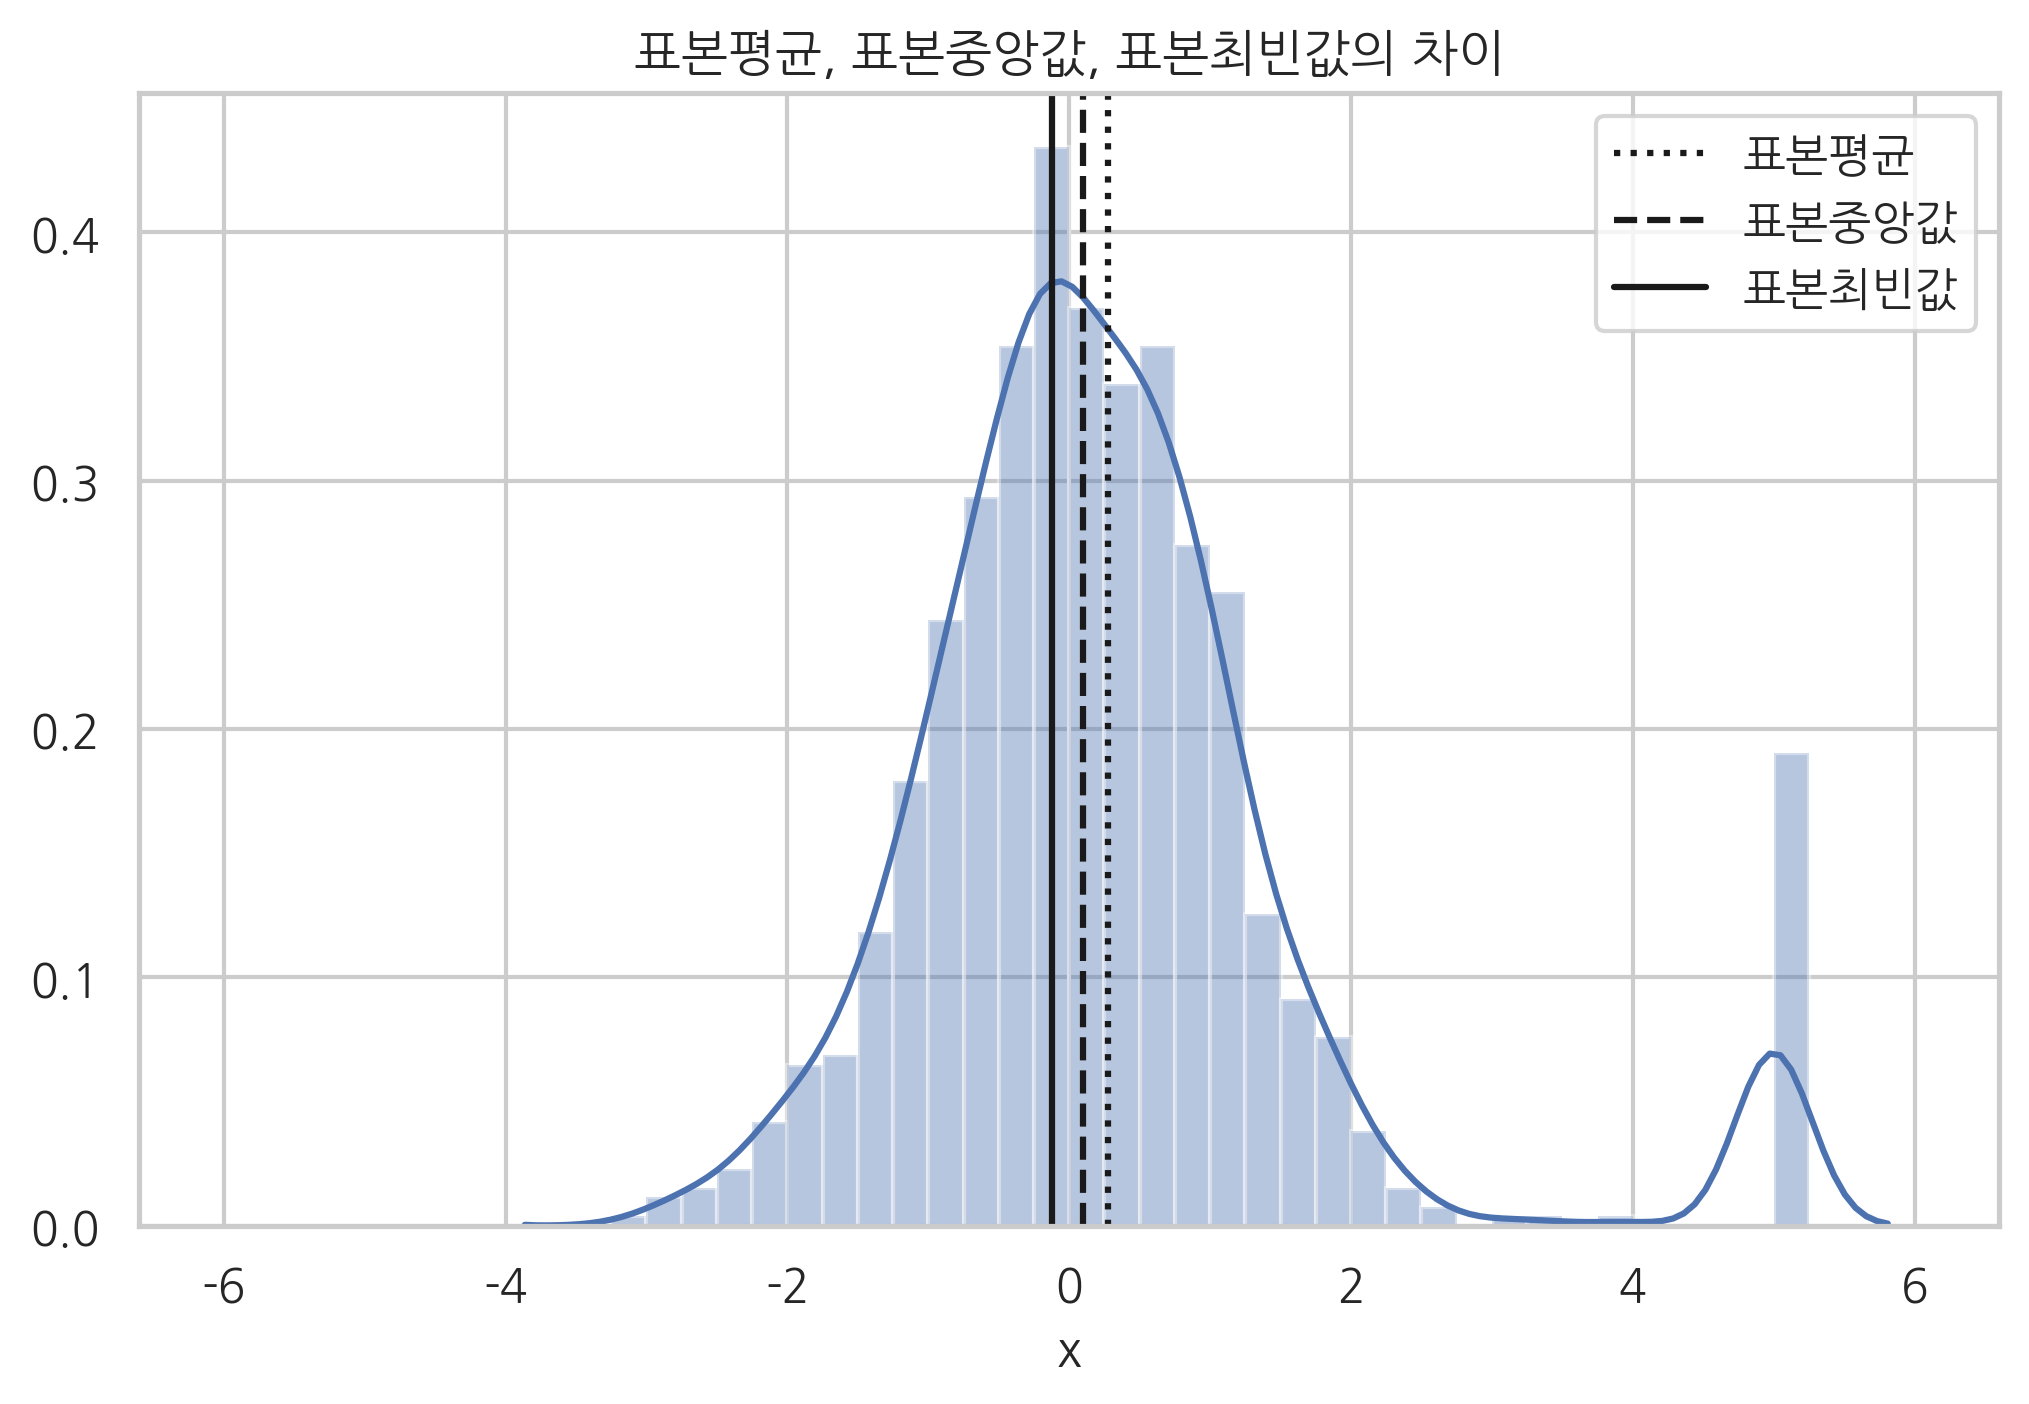

In [5]:
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(x, bins=bins)
plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

In [6]:
sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000)

In [7]:
np.var(x), np.std(x)

(3.896937825248617, 1.9740663173380515)

In [8]:
np.var(x, ddof=1), np.std(x, ddof=1)

(3.900838663912529, 1.9750540913890255)

In [9]:
sp.stats.skew(x), sp.stats.kurtosis(x)  

(0.03385895323565712, -0.0467663244783294)

In [10]:
sp.stats.moment(x, 1), sp.stats.moment(x, 2), sp.stats.moment(x, 3), sp.stats.moment(x, 4)

(0.0, 3.896937825248617, 0.2604706193725514, 44.84817401965371)

In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype='category')
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

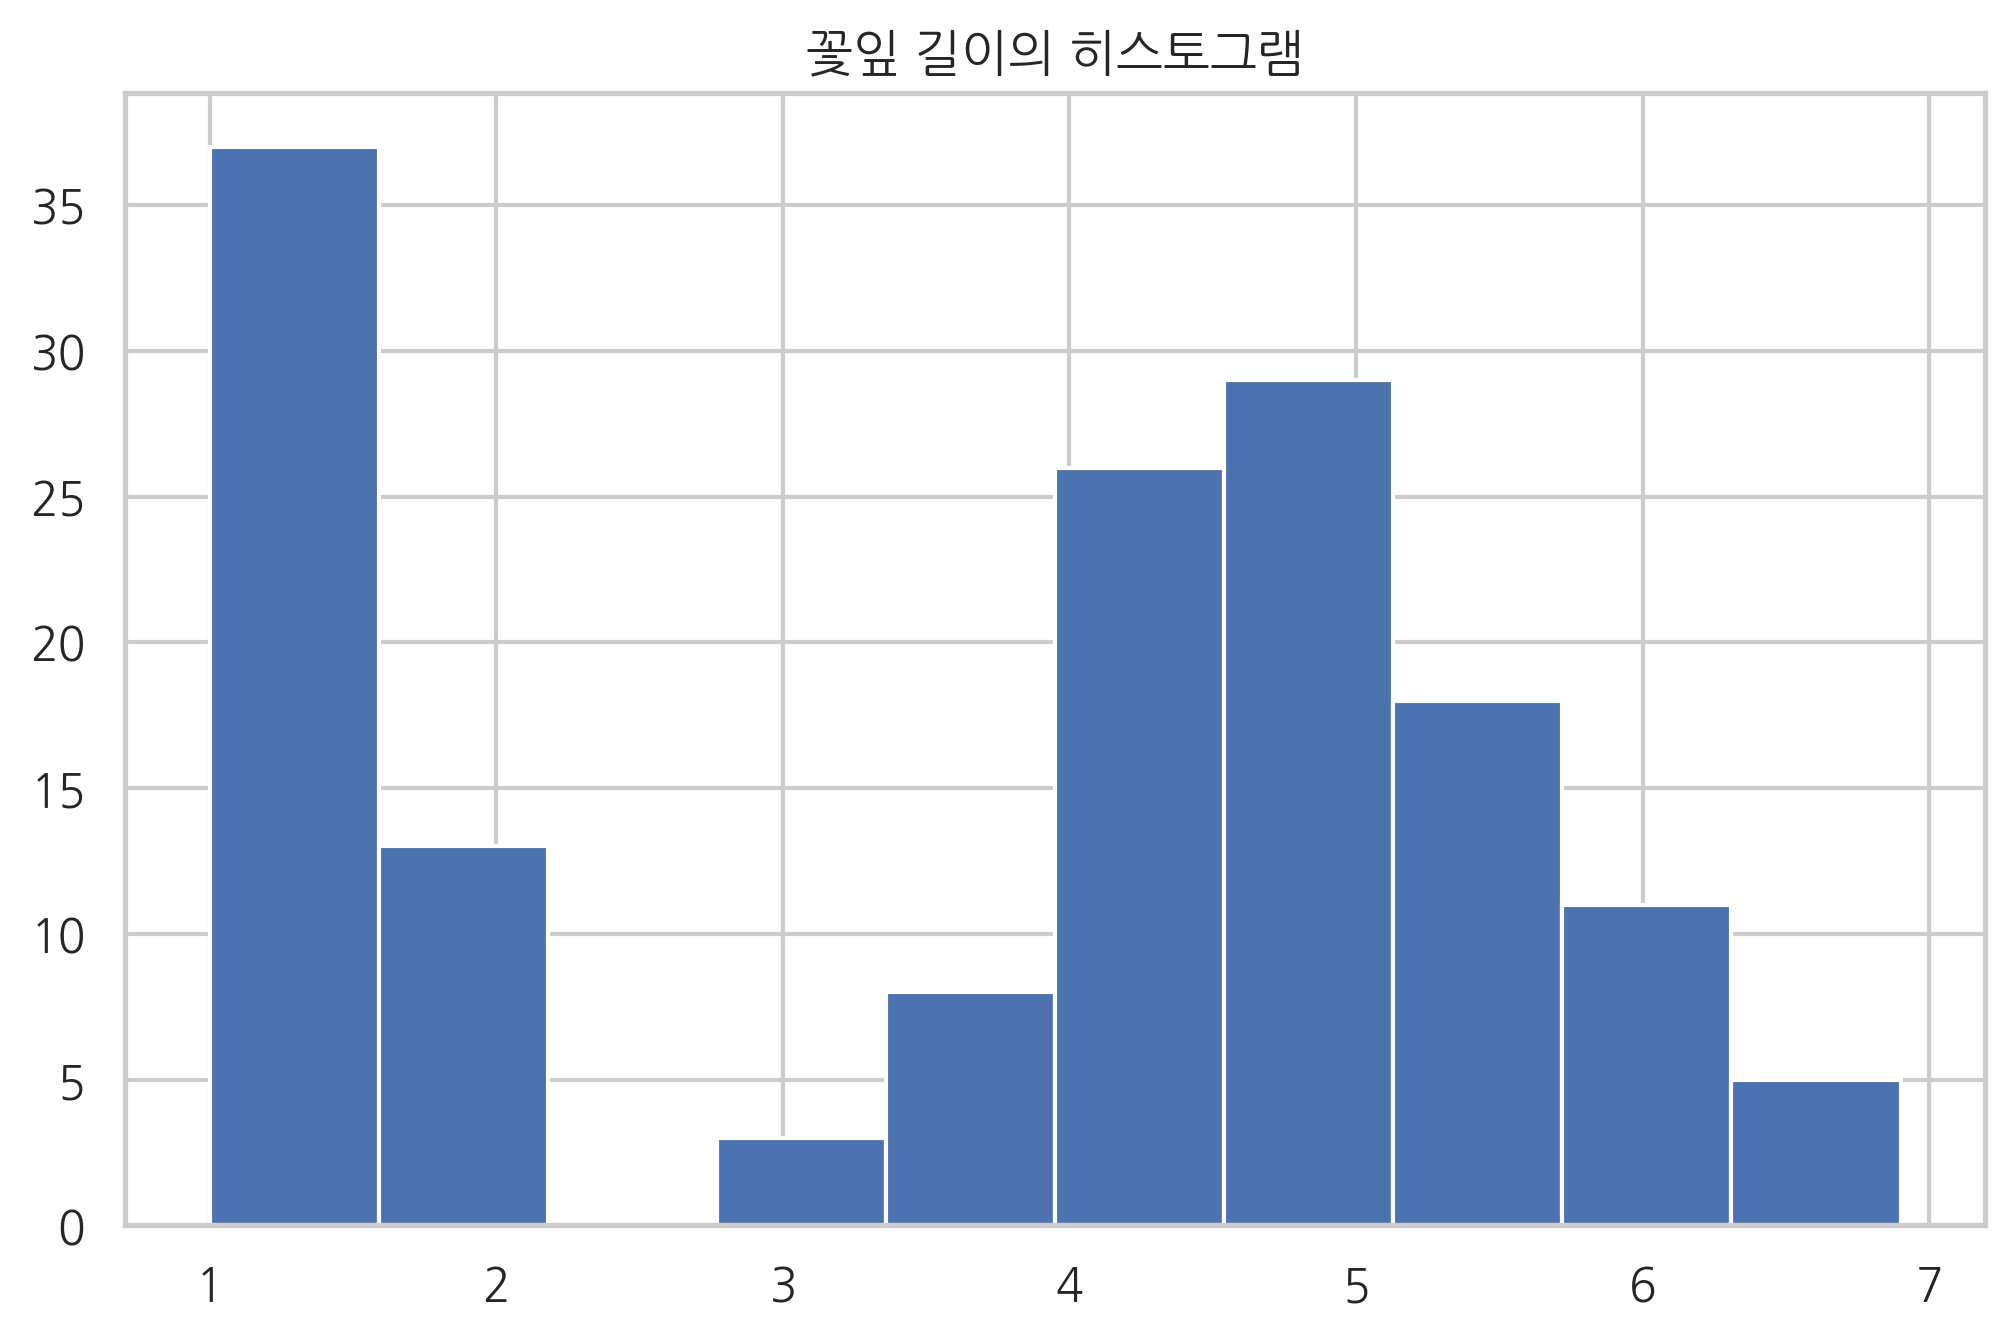

In [12]:
df['petal length (cm)'].hist()
plt.title('꽃잎 길이의 히스토그램')
plt.show()

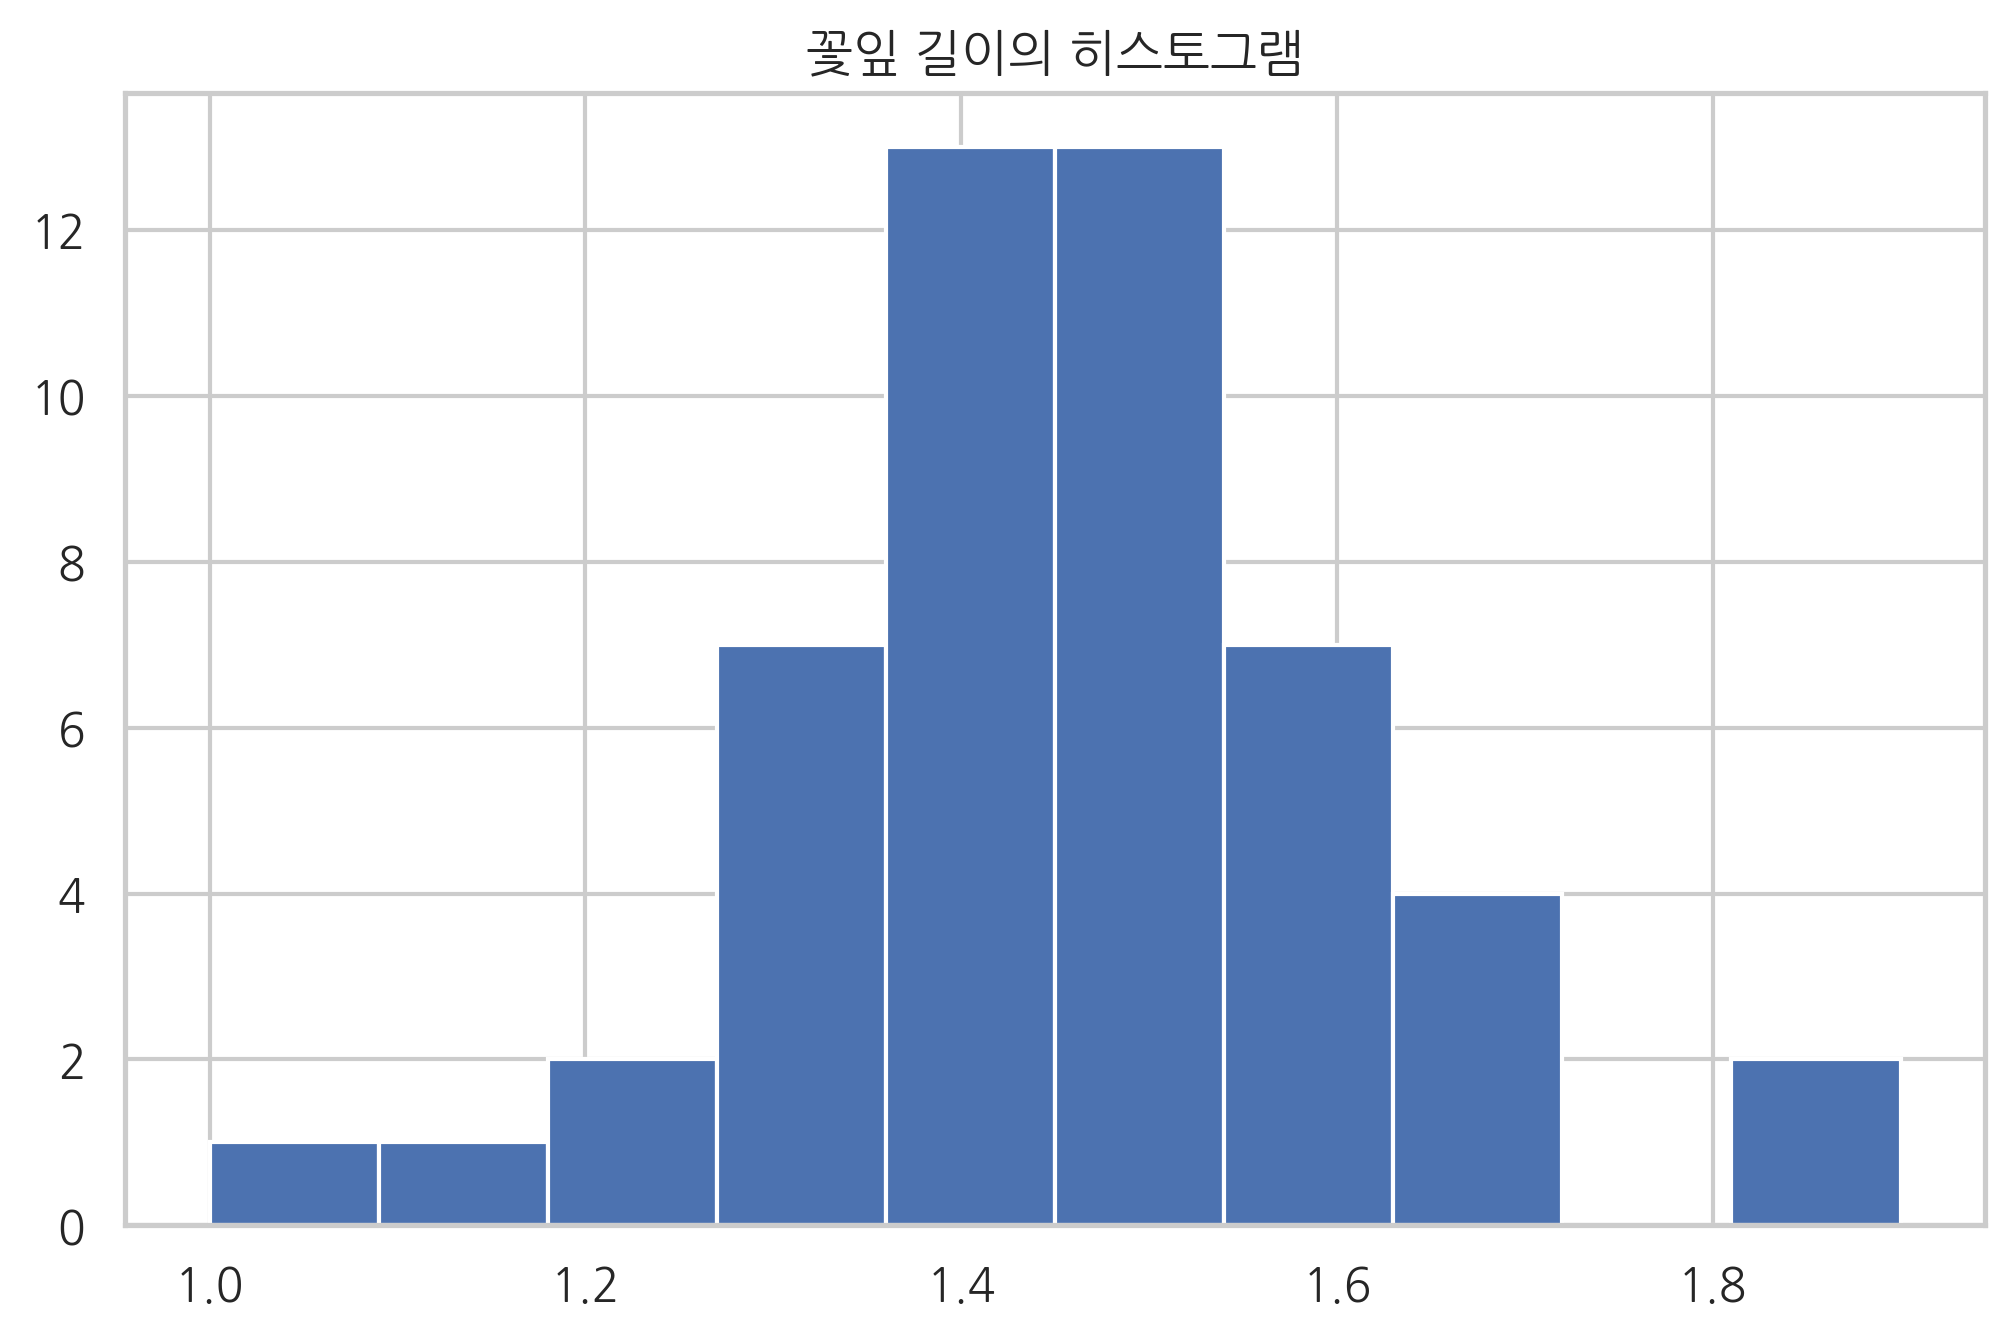

In [13]:
df[df.species == 'setosa']['petal length (cm)'].hist()
plt.title('꽃잎 길이의 히스토그램')
plt.show()

In [14]:
x = df[df.species == 'virginica']['petal length (cm)']

def sample_statistics(x, n, x_min=0, x_max=10):
    bins = np.linspace(x_min, x_max, n+1)
    ns, _ = np.histogram(x, bins=bins)

    sample_mean = np.mean(x)
    sample_median = np.median(x)
    mode_index = np.argmax(ns)
    sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

    print('구간이 {}개일 때'.format(n))
    print('표본평균', sample_mean)
    print('표본중앙값', sample_median)
    print('표본최빈값', sample_mode)

    sns.distplot(x, bins=bins)
    plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
    plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
    plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")
    plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
    plt.xlabel('x')
    plt.legend()
    plt.show()

구간이 10개일 때
표본평균 5.552
표본중앙값 5.55
표본최빈값 5.5


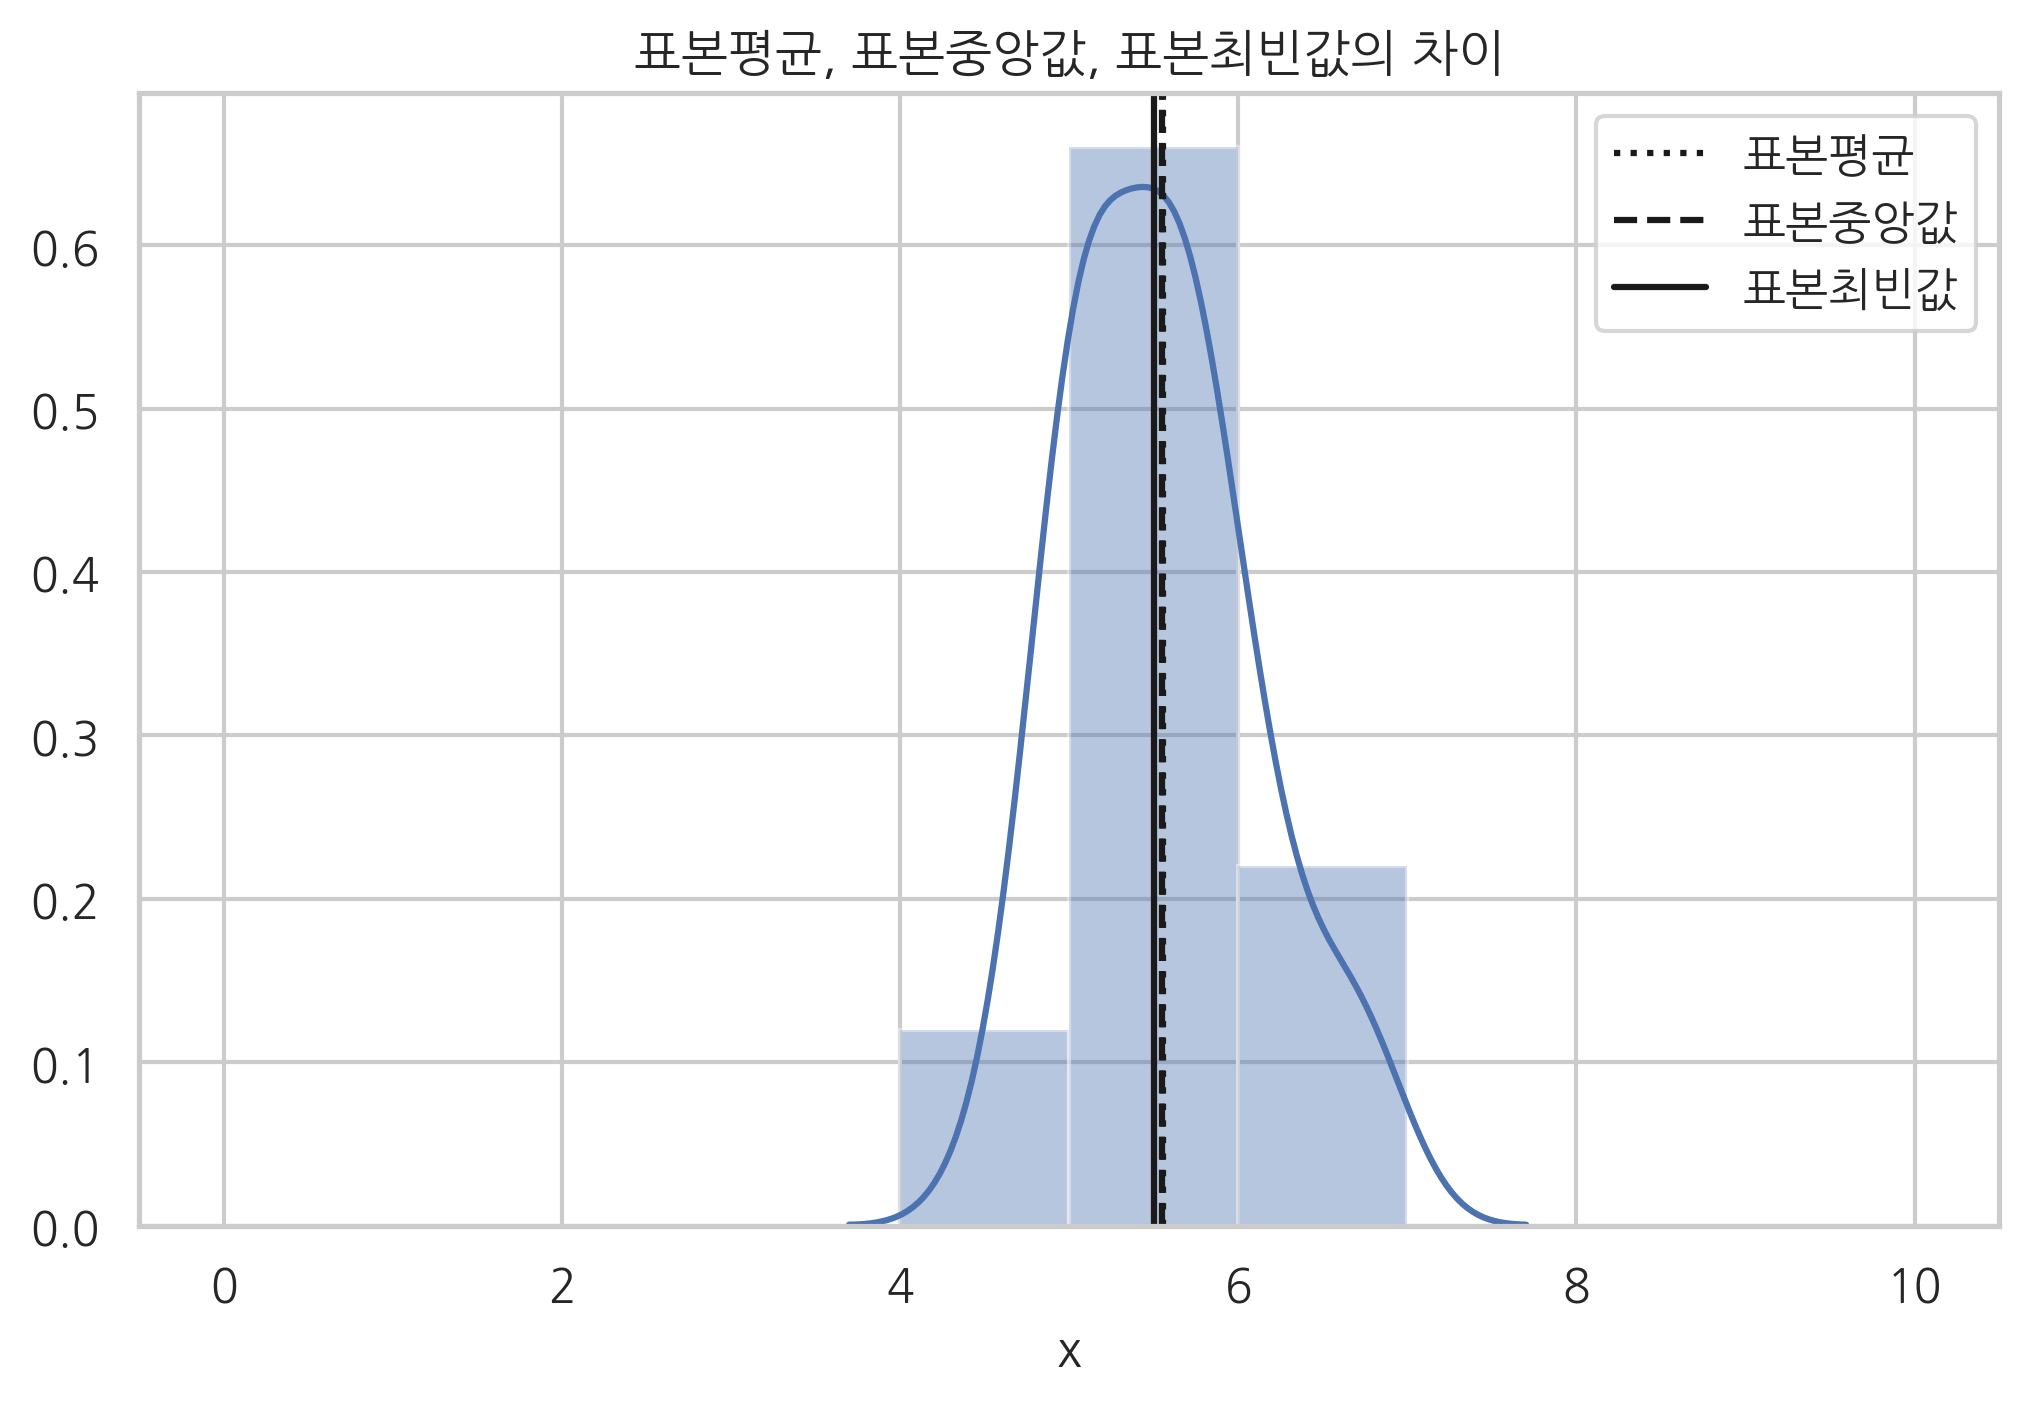

In [15]:
sample_statistics(x, 10)

구간이 50개일 때
표본평균 5.552
표본중앙값 5.55
표본최빈값 5.5


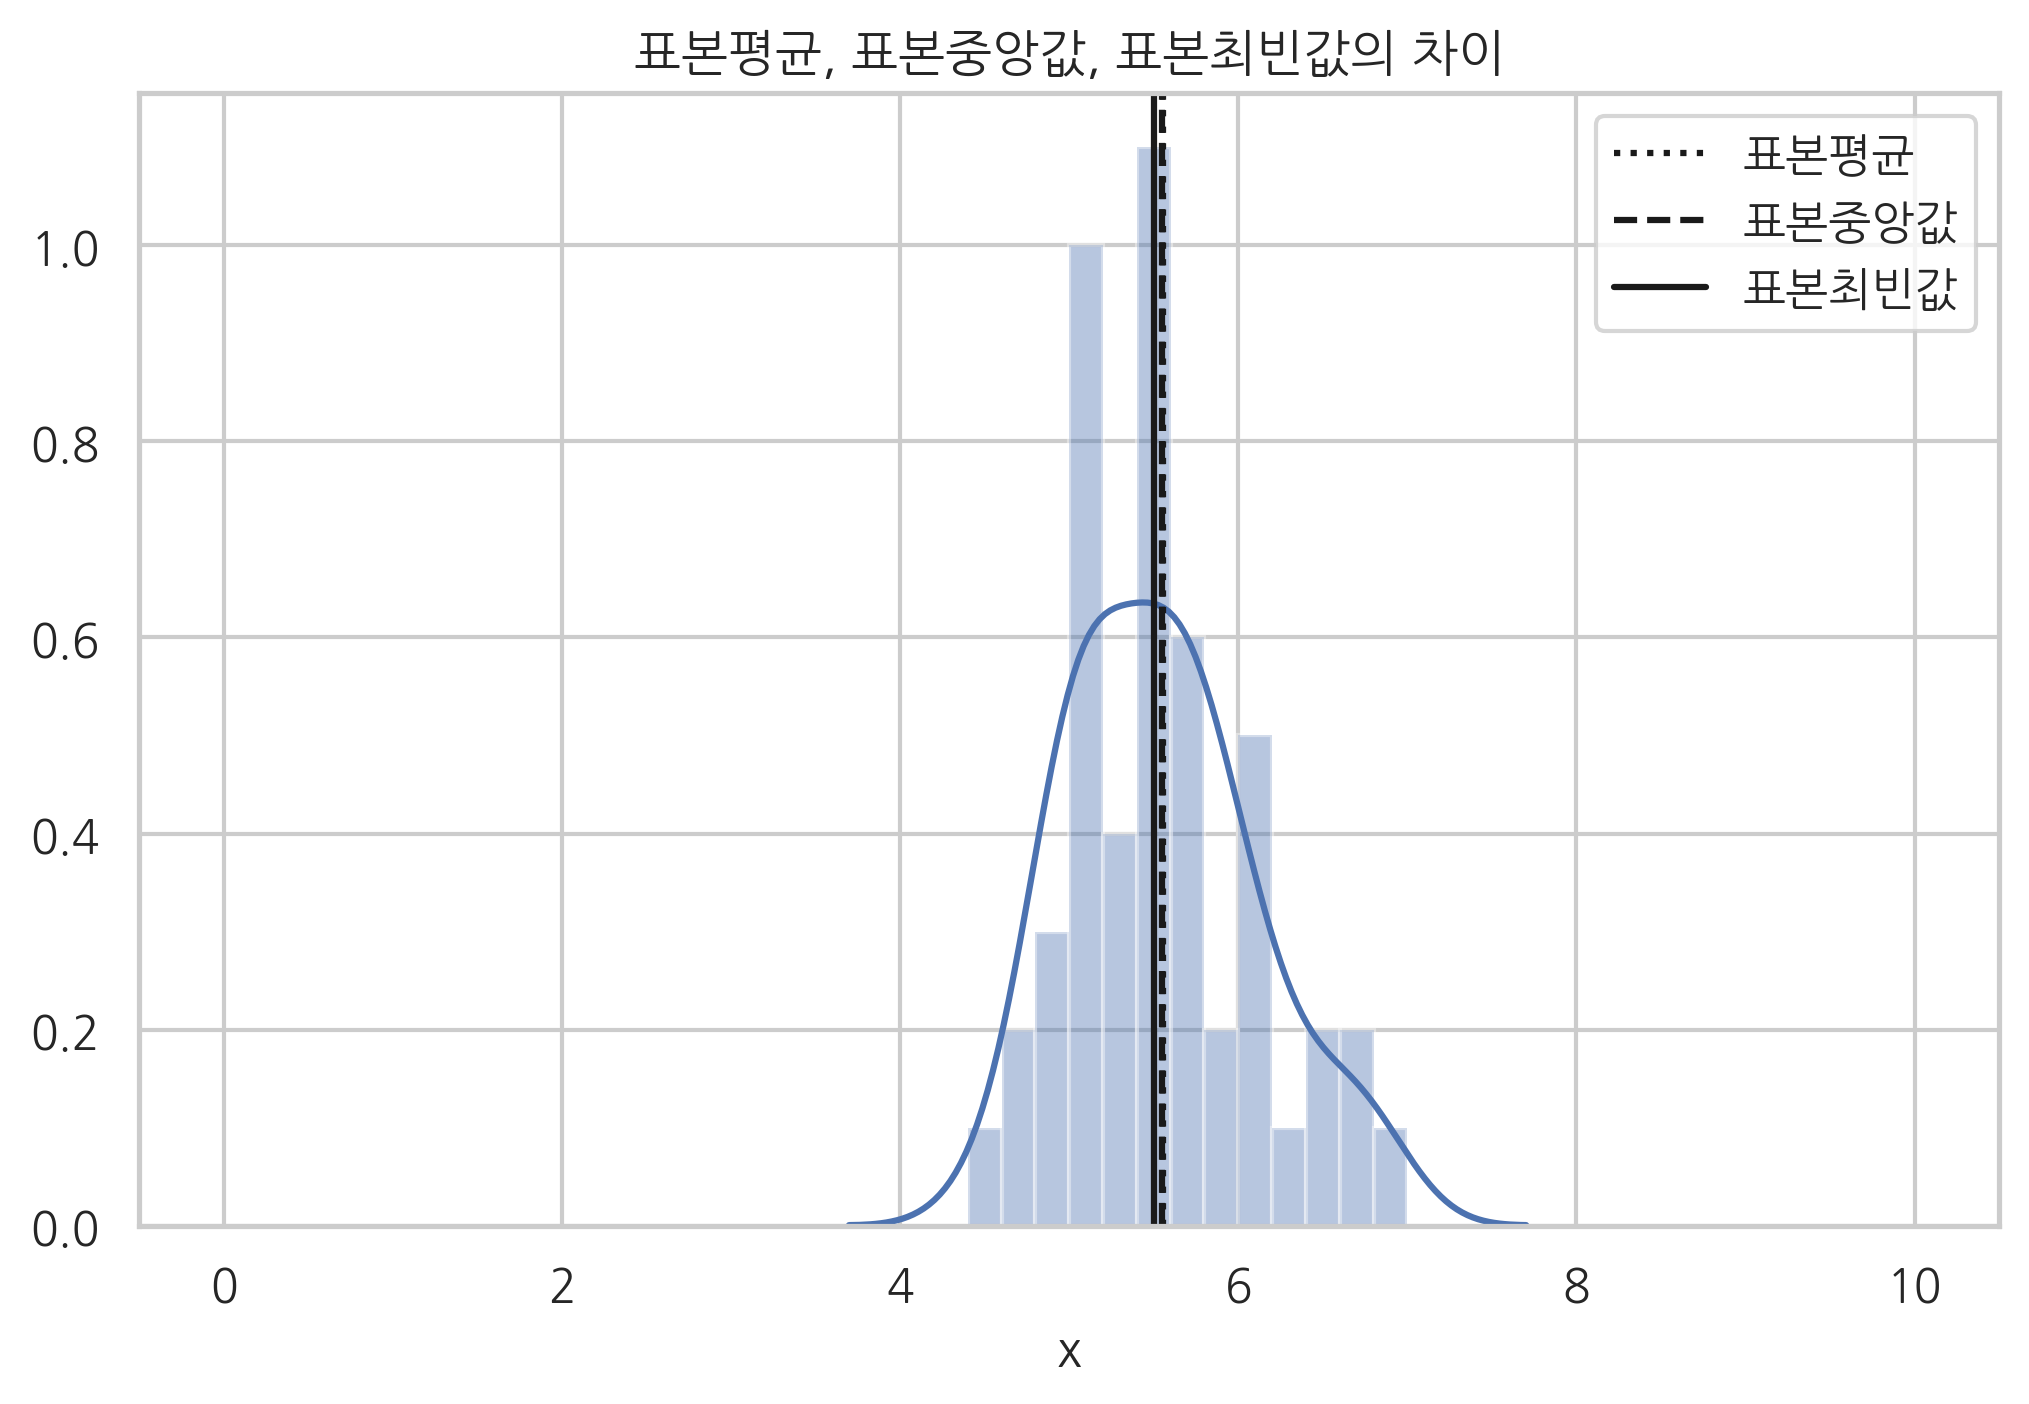

In [16]:
sample_statistics(x, 50)

구간이 100개일 때
표본평균 5.552
표본중앙값 5.55
표본최빈값 5.050000000000001


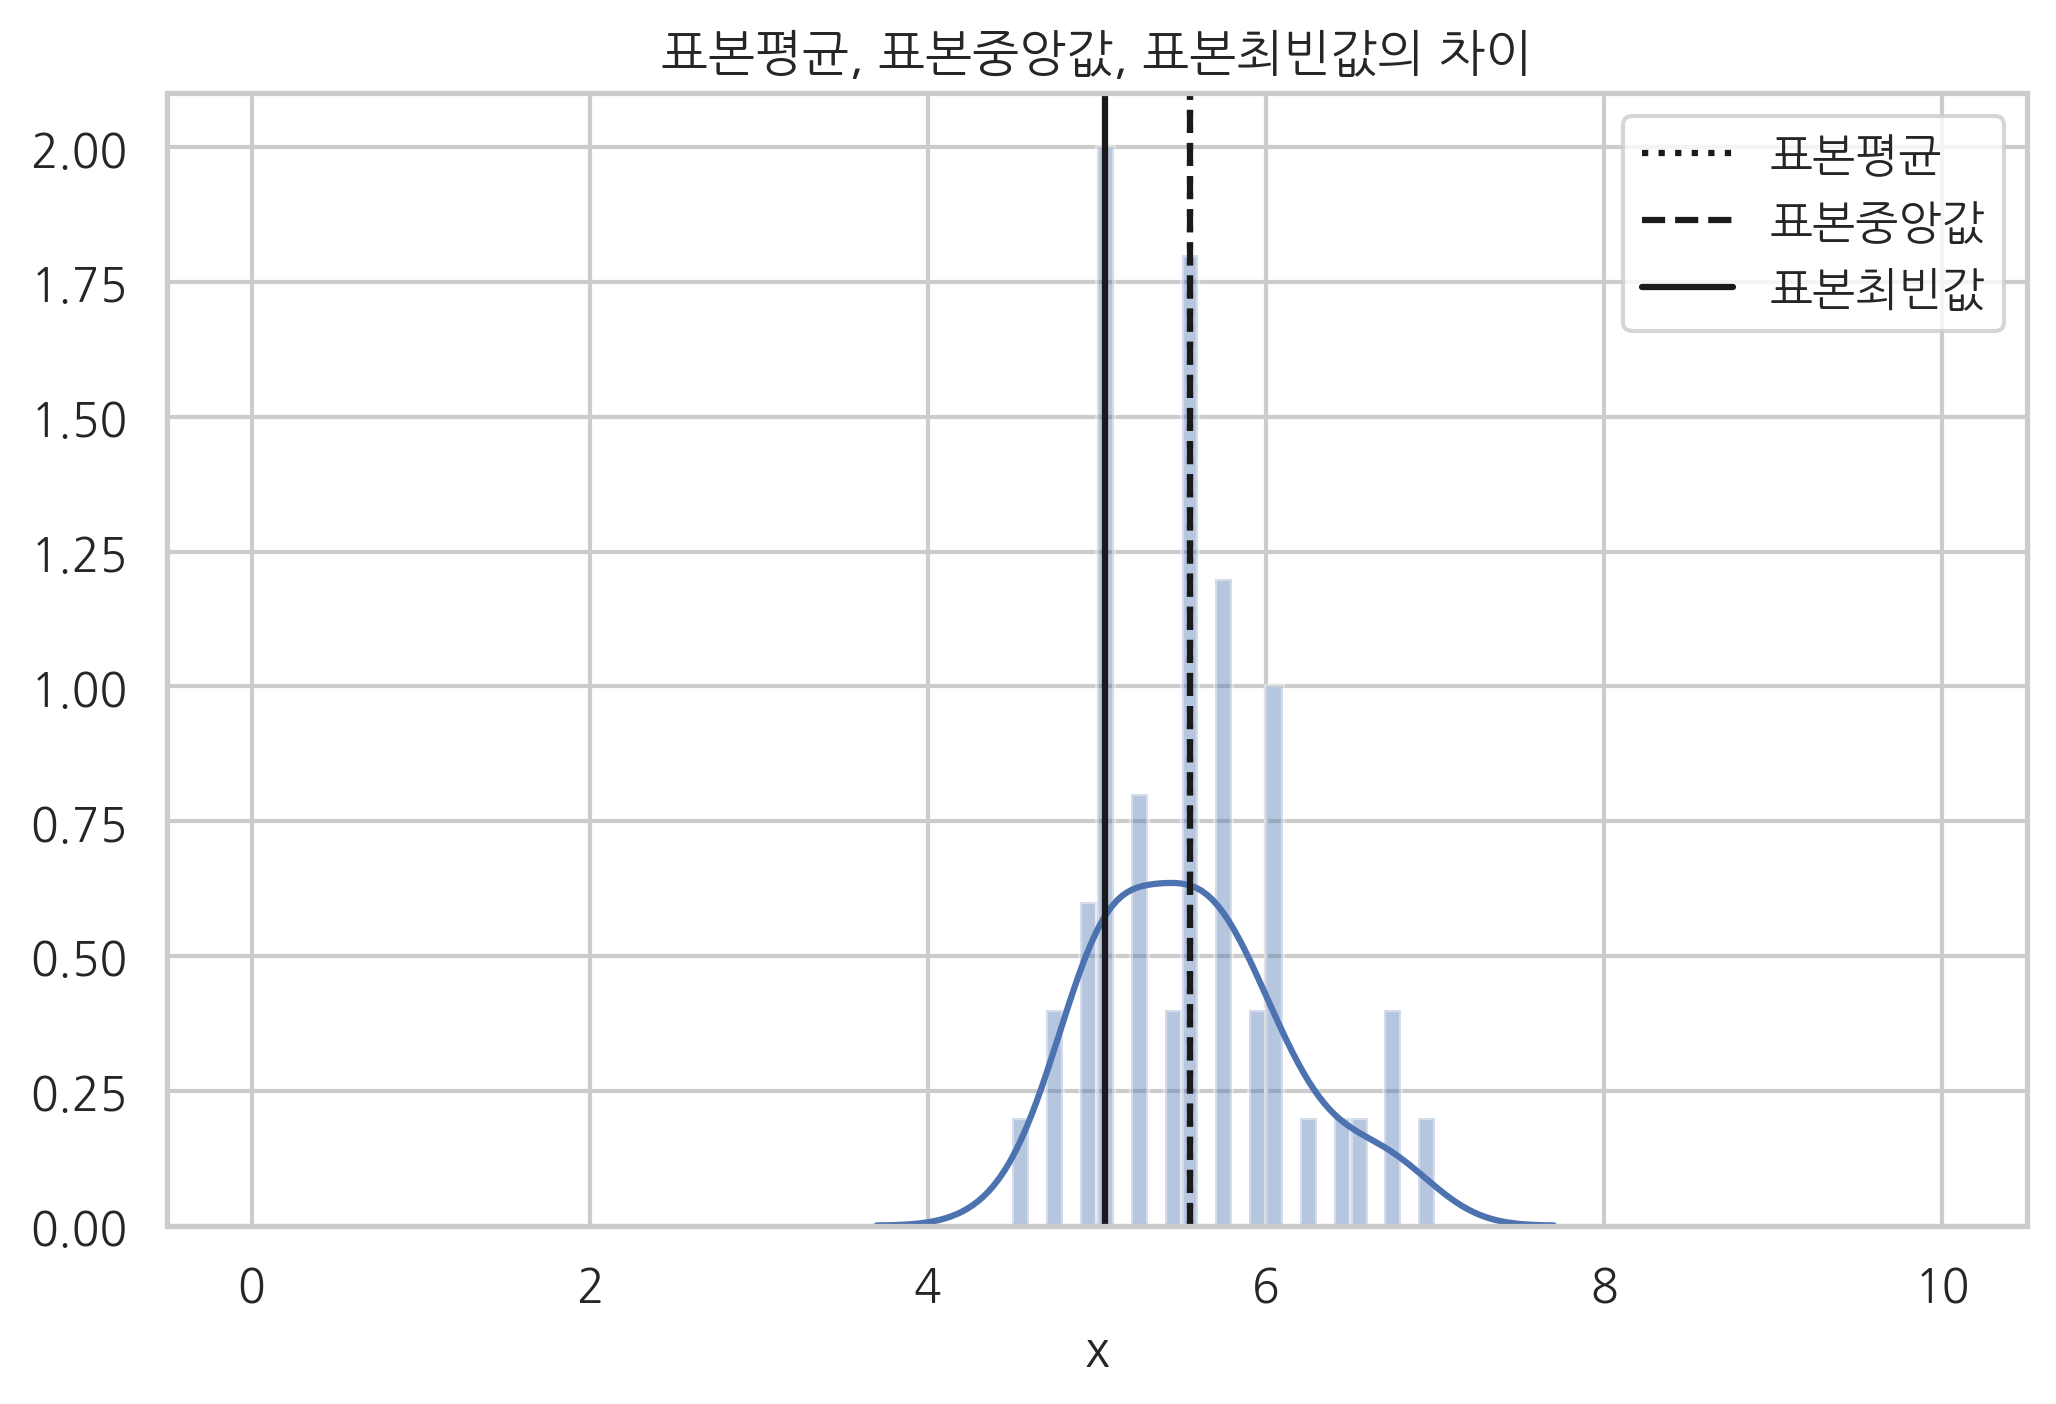

In [17]:
sample_statistics(x, 100)

구간이 100개일 때
표본평균 0.0003044925730224406
표본중앙값 0.0007270256938876112
표본최빈값 0.000899999999999998


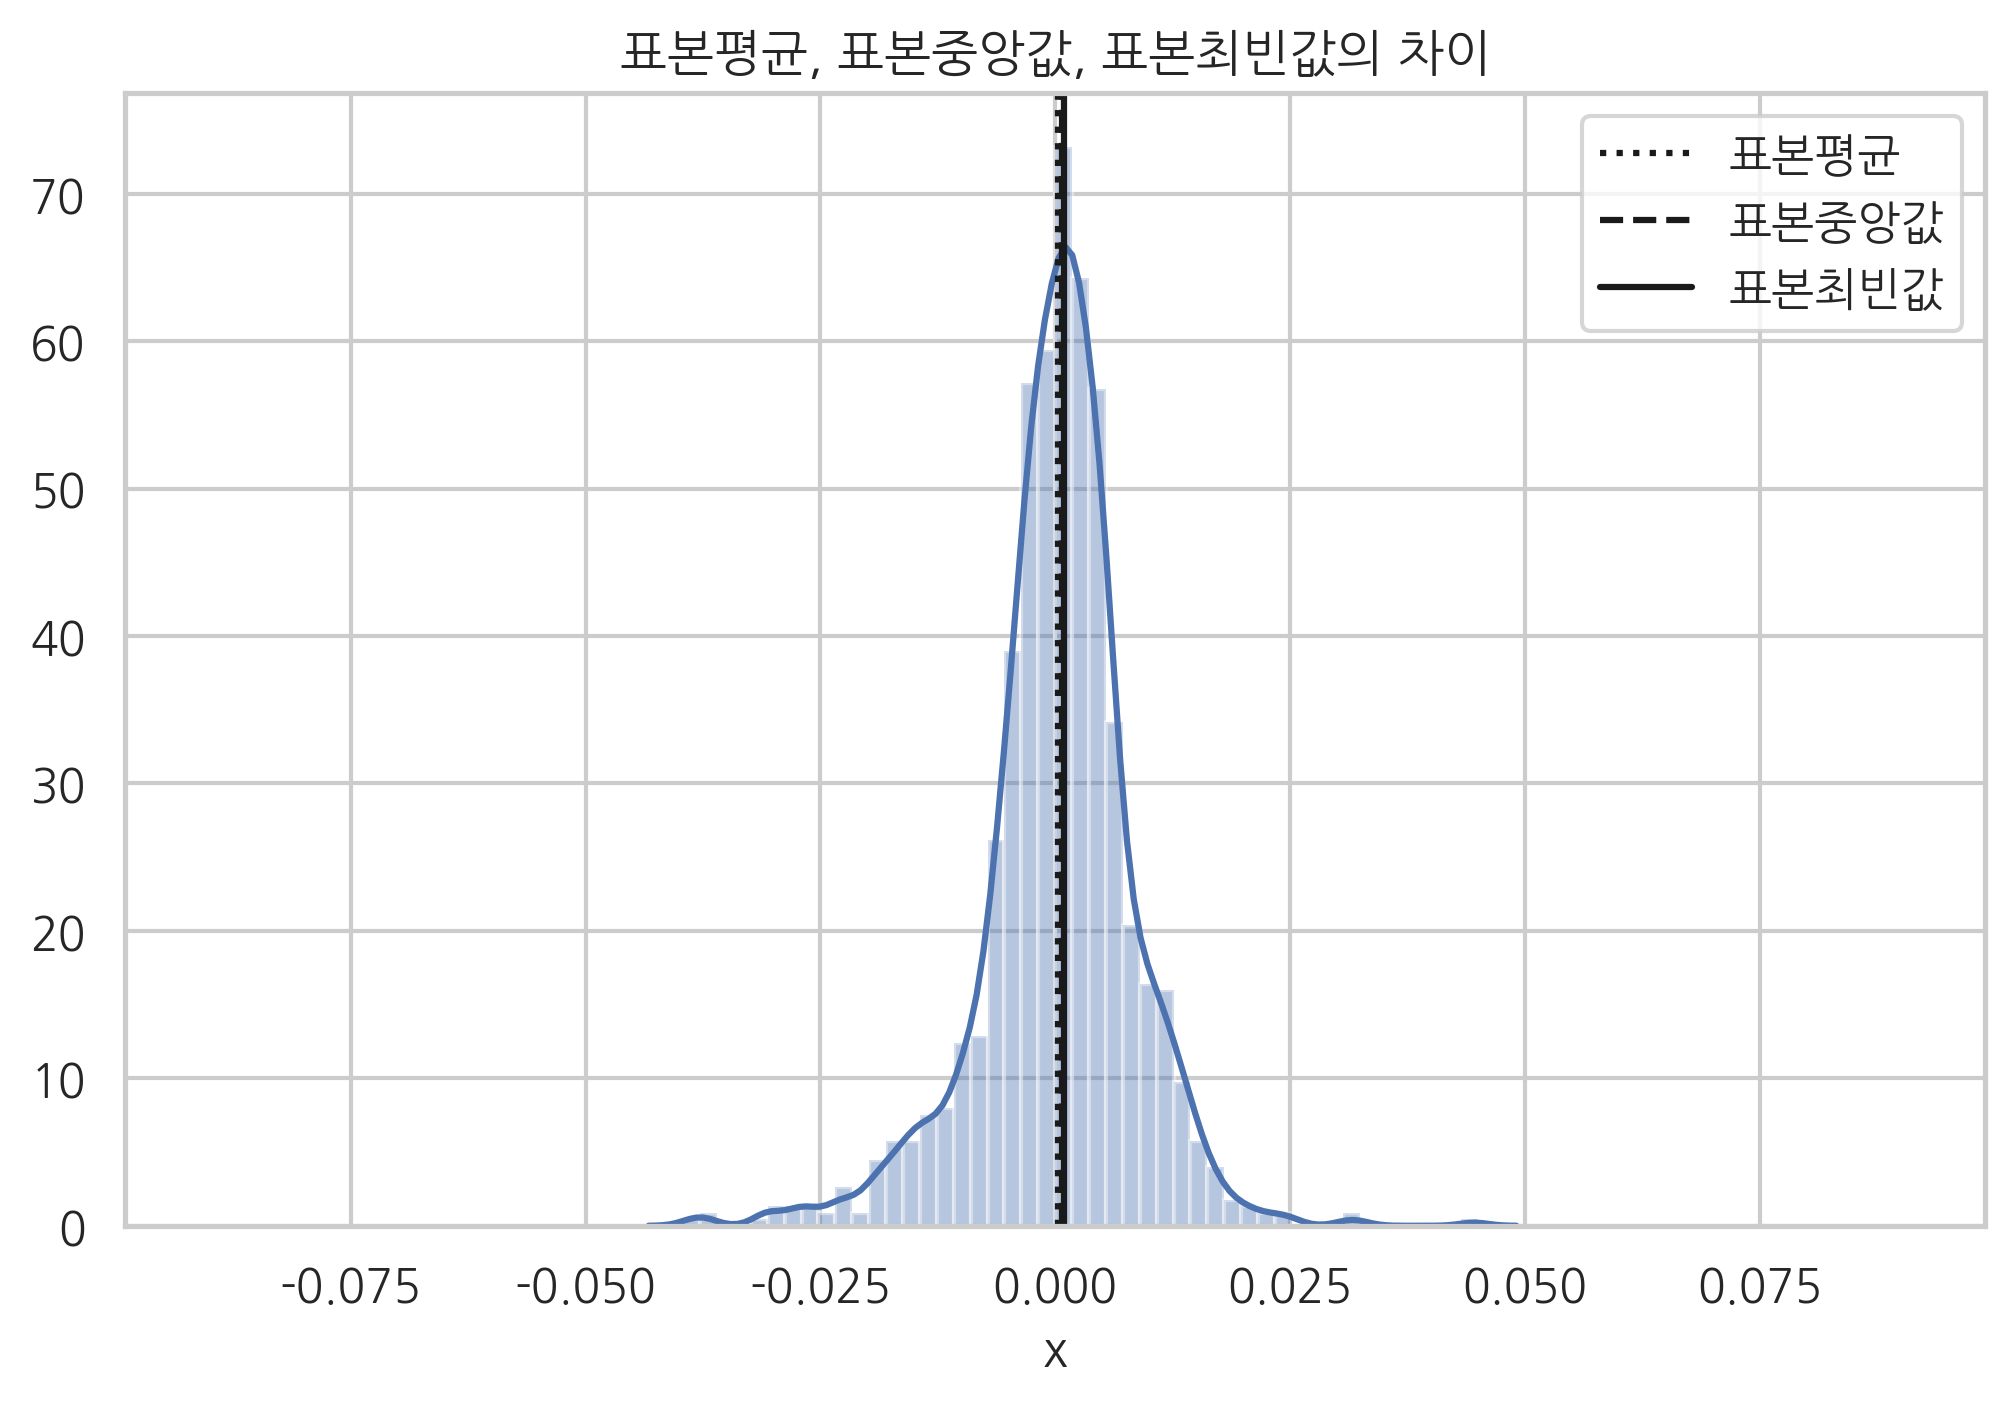

In [18]:
import pandas_datareader.data as web

df = web.DataReader('DJCA', data_source='fred').dropna()['DJCA']
r = np.log(df / df.shift(1)).dropna().values

sample_statistics(r, 100, -0.09, 0.09)

In [19]:
volatility = np.std(r) * np.sqrt(256) * 100
volatility

12.805503489463657